In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os

path = os.listdir('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/training/')
classes = {'nonhuman':0 , 'human':1}


In [4]:
import cv2
X= []
Y= []
for cls in classes:
    pth= 'E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/validation/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])
    

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

0    482
1    405
dtype: int64

In [9]:
X.shape

(887, 200, 200)

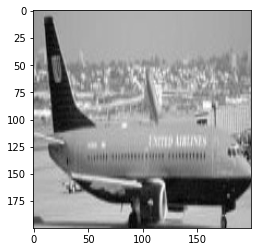

In [10]:
plt.imshow(X[0],cmap='gray')

In [11]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(887, 40000)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [13]:
xtrain.shape , xtest.shape

((709, 40000), (178, 40000))

In [14]:
print (xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0


In [15]:
xtrain = xtrain/255

In [16]:
xtest = xtest/255

In [17]:
print (xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

1.0 0.0
1.0 0.0


In [18]:
from sklearn.decomposition import PCA

In [19]:
print(xtrain.shape,xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(709, 40000) (178, 40000)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train,ytrain)

LogisticRegression(C=0.1)

In [22]:
sv = SVC()
sv.fit(pca_train,ytrain)

SVC()

In [23]:
print("Training Score :" , lg.score(pca_train,ytrain))
print("Testing Score :" , lg.score(pca_test,ytest))

Training Score : 1.0
Testing Score : 0.9157303370786517


In [24]:
pred=sv.predict(pca_test)
np.where(ytest != pred)

(array([  4,  13,  52,  82,  91, 146], dtype=int64),)

In [25]:
pred[4]

0

In [26]:
ytest[13]

1

In [27]:
dec= {0:'nonhuman' , 1:'human'}

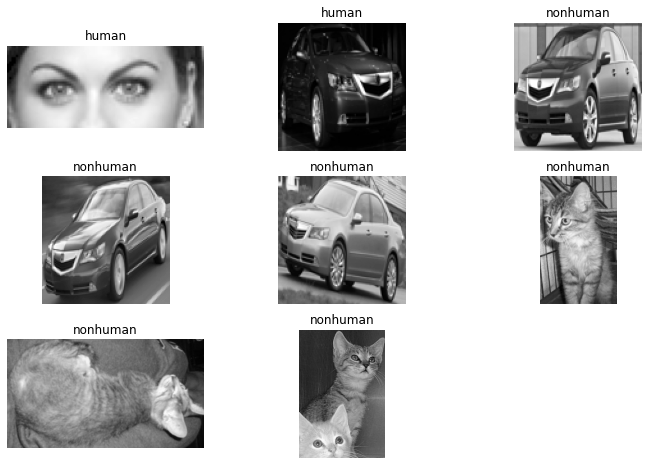

In [28]:
plt.figure(figsize=(12,8))
p=os.listdir('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/testing/')
c=1
for i in os.listdir('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/testing/')[3:11]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/testing/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p= sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
    

In [ ]:
model.evaluate()

In [109]:
print("Training Score :" , sv.score(pca_train,ytrain))
print("Testing Score :" , sv.score(pca_test,ytest))

Training Score : 0.9858956276445698
Testing Score : 0.9662921348314607
